In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline

products = pd.read_csv('amazon_baby_subset.csv',dtype={'name': str, 'review': str, 'rating': float})
products.tail(10)
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53072 entries, 0 to 53071
Data columns (total 4 columns):
name         52982 non-null object
review       52831 non-null object
rating       53072 non-null float64
sentiment    53072 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ MB


In [2]:
products['sentiment'].value_counts()

 1    26579
-1    26493
Name: sentiment, dtype: int64

In [76]:
import json
with open('important_words.json', 'r') as f: # Reads the list of most frequent words
    important_words = json.load(f)
important_words = [str(s) for s in important_words]
len(important_words)

193

## 4. Let us perform 2 simple data transformations:

- Remove punctuation
- Compute word counts (only for important_words)


In [4]:
products = products.fillna({'review': ""}) # fill in N/A's in the review column
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53072 entries, 0 to 53071
Data columns (total 4 columns):
name         52982 non-null object
review       53072 non-null object
rating       53072 non-null float64
sentiment    53072 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ MB


In [5]:
def remove_punctuation(text):
    import string
    translator = str.maketrans(' ',' ', string.punctuation)
    return text.translate(translator) 

products['review_clean'] = products['review'].apply(remove_punctuation)
# products['review_clean'][1]

## 5. Now we proceed with the second item. For each word in important_words, we compute a count for the number of times the word occurs in the review. We will store this count in a separate column (one for each word). The result of this feature processing is a single column for each word in important_words which keeps a count of the number of times the respective word occurs in the review text.

Note: There are several ways of doing this. One way is to create an anonymous function that counts the occurrence of a particular word and apply it to every element in the review_clean column. Repeat this step for every word in important_words. Your code should be analogous to the following:

In [6]:
for word in important_words:
    products[word] = products['review_clean'].apply(lambda s: s.split().count(word))
    
products.head()   

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5.0,1,All of my kids have cried nonstop when I tried...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5.0,1,We wanted to get something to keep track of ou...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5.0,1,My daughter had her 1st baby over a year ago S...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4.0,1,One of babys first and favorite books and it i...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5.0,1,Very cute interactive book My son loves this b...,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [1]:
train_idx = pd.read_json('module-4-assignment-train-idx.json')
val_idx = pd.read_json('module-4-assignment-validation-idx.json')

train_data = products.iloc[train_idx[0],:]
validation_data = products.iloc[val_idx[0],:]
train_data_copy = train_data.copy()
val_data_copy = validation_data.copy()






NameError: name 'pd' is not defined

In [8]:
train_data.head()

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
0,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5.0,1,All of my kids have cried nonstop when I tried...,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Nature's Lullabies Second Year Sticker Calendar,We wanted to get something to keep track of ou...,5.0,1,We wanted to get something to keep track of ou...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Lamaze Peekaboo, I Love You","One of baby's first and favorite books, and it...",4.0,1,One of babys first and favorite books and it i...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,SoftPlay Peek-A-Boo Where's Elmo A Children's ...,Very cute interactive book! My son loves this ...,5.0,1,Very cute interactive book My son loves this b...,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
5,Our Baby Girl Memory Book,"Beautiful book, I love it to record cherished ...",5.0,1,Beautiful book I love it to record cherished t...,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
validation_data.head()

,name,review,rating,sentiment,review_clean,baby,one,great,love,use,...,seems,picture,completely,wish,buying,babies,won,tub,almost,either
2,Nature's Lullabies Second Year Sticker Calendar,My daughter had her 1st baby over a year ago. ...,5.0,1,My daughter had her 1st baby over a year ago S...,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Cloth Diaper Pins Stainless Steel Traditional ...,It has been many years since we needed diaper ...,5.0,1,It has been many years since we needed diaper ...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,Fisher Price Nesting Action Vehicles,For well over a year my son has enjoyed stacki...,5.0,1,For well over a year my son has enjoyed stacki...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26,Sassy Who Loves Baby? Photo Album Book with te...,I bought this for a new granddaughter. I will...,5.0,1,I bought this for a new granddaughter I will ...,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
27,Earlyears: Earl E. Bird with Teething Rings,We received an Earl E. Bird as a gift when we ...,5.0,1,We received an Earl E Bird as a gift when we h...,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# Convert data frame to multi-dimensional array

Write a function that extracts columns from a data frame and converts them into a multi-dimensional array. We plan to use them throughout the course, so make sure to get this function right.

#### The function should accept three parameters:
- dataframe: a data frame to be converted
- features: a list of string, containing the names of the columns that are used as features.
- label: a string, containing the name of the single column that is used as class labels.

#### The function should return two values:
- one 2D array for features
- one 1D array for class labels

#### The function should do the following:
- Prepend a new column constant to dataframe and fill it with 1's. This column takes account of the intercept term. - - Make sure that the constant column appears first in the data frame.
- Prepend a string 'constant' to the list features. Make sure the string 'constant' appears first in the list.
- Extract columns in dataframe whose names appear in the list features.
- Convert the extracted columns into a 2D array using a function in the data frame library. If you are using Pandas, you would use as_matrix() function.
- Extract the single column in dataframe whose name corresponds to the string label.
- Convert the column into a 1D array.
- Return the 2D array and the 1D array.

In [10]:
def get_numpy_data(dataframe, features, label):
    dataframe['constant'] = 1
    features = ['constant'] + features
    features_frame = dataframe[features]
    feature_matrix = features_frame.as_matrix()
    label_sarray = dataframe[label]
    label_array = label_sarray.as_matrix()
    return(feature_matrix, label_array)

## 6. Convert train_data and validation_data into multi-dimensional arrays.

In [15]:
feature_matrix_train, sentiment_train = get_numpy_data(train_data, important_words, 'sentiment')
feature_matrix_valid, sentiment_valid = get_numpy_data(validation_data, important_words, 'sentiment') 

/Users/gcptien/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
feature_matrix, sentiment = get_numpy_data(products, important_words, 'sentiment')

In [17]:
feature_matrix_train.shape

(42361, 194)

# Estimating conditional probability with link function
$P(y_i = +1 | \mathbf{x}_i, \mathbf{w}) = \dfrac{1}{1 + \exp{(-\mathbf{w}^\intercal h(\mathbf{x}_i))}}$

where the feature vector $h(\mathbf{x}_i)$ represents the word counts of important_words in the review $\mathbf{x}_i$

Write a function named predict_probability that implements the link function.

Take two parameters: feature_matrix and coefficients.
First compute the dot product of feature_matrix and coefficients.
Then compute the link function $P(y = +1 | \mathbf{x}, \mathbf{w})$.
Return the predictions given by the link function.
Your code should be analogous to the following Python function:

In [18]:
### '''
### produces probablistic estimate for P(y_i = +1 | x_i, w).
###estimate ranges between 0 and 1.
###'''
def predict_probability(feature_matrix, coefficients):
    # Take dot product of feature_matrix and coefficients  
    score = np.dot(feature_matrix, coefficients)
    
    # Compute P(y_i = +1 | x_i, w) using the link function
    predictions = 1 / (1 + np.exp(-score))
    
    # return predictions
    return predictions

In [19]:
dummy_feature_matrix = np.array([[1.,2.,3.], [1.,-1.,-1]])
dummy_coefficients = np.array([1., 3., -1.])

correct_scores      = np.array( [ 1.*1. + 2.*3. + 3.*(-1.),          1.*1. + (-1.)*3. + (-1.)*(-1.) ] )
correct_predictions = np.array( [ 1./(1+np.exp(-correct_scores[0])), 1./(1+np.exp(-correct_scores[1])) ] )

print ('The following outputs must match ')
print ('------------------------------------------------')
print ('correct_predictions           =', correct_predictions)
print ('output of predict_probability =', predict_probability(dummy_feature_matrix, dummy_coefficients))

The following outputs must match 
------------------------------------------------
correct_predictions           = [ 0.98201379  0.26894142]
output of predict_probability = [ 0.98201379  0.26894142]


# Adding L2 penalty
## 8. Let us now work on extending logistic regression with an L2 penalty. As discussed in the lectures, the L2 regularization is particularly useful in preventing overfitting. In this assignment, we will explore L2 regularization in detail.

Recall from lecture and the previous assignment that for logistic regression without an L2 penalty, the derivative of the log-likelihood function is:

$\displaystyle \frac{\partial \ell}{\partial w_j} = \sum_{i=1}^N h_j(\mathbf{x}_i) (\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})) $


Adding L2 penalty to the derivative

In [30]:
def feature_derivative_with_L2(errors, feature, coefficient, l2_penalty, feature_is_constant): 
    
    # Compute the dot product of errors and feature
    ## YOUR CODE HERE
    derivative = np.dot(errors,feature)

    # add L2 penalty term for any feature that isn't the intercept.
    if not feature_is_constant: 
        derivative = derivative - (2 * l2_penalty * coefficient)
        
    return derivative

### Quiz question: In the code above, was the intercept term regularized?
NO

# Adding L2 penalty to the derivative

## 9. It takes only a small modification to add a L2 penalty. All terms indicated in red refer to terms that were added due to an L2 penalty.

Recall from the lecture that the link function is still the sigmoid:
$P(y_i = +1 | \mathbf{x}_i, \mathbf{w}) = \dfrac{1}{1 + \exp{(-\mathbf{w}^\intercal h(\mathbf{x}_i))}}$

We add the L2 penalty term to the per-coefficient derivative of log likelihood:
$\displaystyle \frac{\partial \ell}{\partial w_j} = \sum_{i=1}^N h_j(\mathbf{x}_i) (\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})) \color{red}{- 2\lambda w_j} $

The per-coefficient derivative for logistic regression with an L2 penalty is as follows:

$\displaystyle \frac{\partial \ell}{\partial w_j} = \sum_{i=1}^N h_j(\mathbf{x}_i) (\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})) \color{red}{- 2\lambda w_j} $

and for the intercept term, we have

$\displaystyle \frac{\partial \ell}{\partial w_0} = \sum_{i=1}^N h_0(\mathbf{x}_i) (\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})) $

Write a function that computes the derivative of log likelihood with respect to a single coefficient w_j. Unlike its counterpart in the last assignment, the function accepts five parameters:

- errors: vector whose i-th value contains
$\mathbf{1}[y_i = +1] - P(y_i = +1 | \mathbf{x}_i, \mathbf{w})$

- feature: vector whose i-th value contains
$h_j(\mathbf{x}_i)$
- coefficient: the current value of the j-th coefficient.
- l2_penalty: the L2 penalty constant \lambdaλ
- feature_is_constant: a Boolean value indicating whether the j-th feature is constant or not.

The function should do the following:

- Take the five parameters as above.
- Compute the dot product of errors and feature and save the result to derivative.
- If feature_is_constant is False, subtract the L2 penalty term from derivative. Otherwise, do nothing.
Return derivative.

## 10. To verify the correctness of the gradient descent algorithm, we write a function for computing log likelihood (which we recall from the last assignment was a topic detailed in an advanced optional video, and used here for its numerical stability), which is given by the formula

$\displaystyle \ell \ell (\mathbf{w}) = \sum_{i=1}^N \Big( (\mathbf{1}[y_i = +1] - 1) \mathbf{w}^\intercal h(\mathbf{w}_i) - \ln{\big(1 + \exp{(-\mathbf{w}^\intercal h(\mathbf{x}_i) )} \big)} \Big) \color{red}{-\lambda \|\mathbf{w}\|_2^2}$

The function should be analogous to the following Python function:

In [31]:
def compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty):
    indicator = (sentiment==+1)
    scores = np.dot(feature_matrix, coefficients)
    
    lp = np.sum((indicator-1)*scores - np.log(1. + np.exp(-scores))) - l2_penalty*np.sum(coefficients[1:]**2)
    
    return lp

### Quiz question: Does the term with L2 regularization increase or decrease ℓℓ(w)?

Decrease

# 11. The logistic regression function looks almost like the one in the last assignment, with a minor modification to account for the L2 penalty.

Write a function logistic_regression_with_L2 to fit a logistic regression model under L2 regularization.

The function accepts the following parameters:

- feature_matrix: 2D array of features
- sentiment: 1D array of class labels
- initial_coefficients: 1D array containing initial values of coefficients
- step_size: a parameter controlling the size of the gradient steps
- l2_penalty: the L2 penalty constant $\lambda$
- max_iter: number of iterations to run gradient ascent

The function returns the last set of coefficients after performing gradient ascent.

The function carries out the following steps:

- Initialize vector coefficients to initial_coefficients.
- Predict the class probability $P(y_i = +1 | \mathbf{x}_i,\mathbf{w})$
using your predict_probability function and save it to variable predictions.
- Compute indicator value for $(y_i = +1)$ by comparing sentiment against +1. 
- Save it to variable indicator.
- Compute the errors as difference between indicator and predictions. Save the errors to variable errors.
- For each j-th coefficient, compute the per-coefficient derivative by calling feature_derivative_L2 with the j-th column of feature_matrix. Don't forget to supply the L2 penalty. Then increment the j-th coefficient by (step_size*derivative).
- Once in a while, insert code to print out the log likelihood.
- Repeat steps 2-6 for max_iter times.




In [32]:
def logistic_regression_with_L2(feature_matrix, sentiment, initial_coefficients, step_size, l2_penalty, max_iter):
    coefficients = np.array(initial_coefficients) # make sure it's a numpy array
    for itr in range(max_iter):
        # Predict P(y_i = +1|x_i,w) using your predict_probability() function
        ## YOUR CODE HERE
        predictions = predict_probability(feature_matrix,coefficients)
        
        # Compute indicator value for (y_i = +1)
        indicator = (sentiment==+1)
        
        # Compute the errors as indicator - predictions
        errors = indicator - predictions
        for j in range(len(coefficients)): # loop over each coefficient
            is_intercept = (j == 0)
            # Recall that feature_matrix[:,j] is the feature column associated with coefficients[j].
            # Compute the derivative for coefficients[j]. Save it in a variable called derivative
            ## YOUR CODE HERE
            derivative = feature_derivative_with_L2(errors, feature_matrix[:,j], coefficients[j], l2_penalty, is_intercept)
            
            # add the step size times the derivative to the current coefficient
            ## YOUR CODE HERE
            coefficients[j] += step_size * derivative
        
        # Checking whether log likelihood is increasing
        if itr <= 15 or (itr <= 100 and itr % 10 == 0) or (itr <= 1000 and itr % 100 == 0) \
        or (itr <= 10000 and itr % 1000 == 0) or itr % 10000 == 0:
            lp = compute_log_likelihood_with_L2(feature_matrix, sentiment, coefficients, l2_penalty)
            print ('iteration %*d: log likelihood of observed labels = %.8f' % \
                (int(np.ceil(np.log10(max_iter))), itr, lp))
    return coefficients

## 12. Now that we have written up all the pieces needed for an L2 solver with logistic regression, let's explore the benefits of using L2 regularization while analyzing sentiment for product reviews. As iterations pass, the log likelihood should increase.

Let us train models with increasing amounts of regularization, starting with no L2 penalty, which is equivalent to our previous logistic regression implementation. Train 6 models with L2 penalty values 0, 4, 10, 1e2, 1e3, and 1e5. Use the following values for the other parameters:

- feature_matrix = feature_matrix_train extracted in #7
- sentiment = sentiment_train extracted in #7
- initial_coefficients = a 194-dimensional vector filled with zeros
- step_size = 5e-6
- max_iter = 501
- Save the 6 sets of coefficients as coefficients_0_penalty, coefficients_4_penalty, coefficients_10_penalty, coefficients_1e2_penalty, coefficients_1e3_penalty, and coefficients_1e5_penalty respectively.

In [136]:
coefficients_0_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                     initial_coefficients=np.zeros(194),
                                                     step_size=5e-6, l2_penalty=0, max_iter=501)

iteration   0: log likelihood of observed labels = -29179.39138303
iteration   1: log likelihood of observed labels = -29003.71259047
iteration   2: log likelihood of observed labels = -28834.66187288
iteration   3: log likelihood of observed labels = -28671.70781507
iteration   4: log likelihood of observed labels = -28514.43078198
iteration   5: log likelihood of observed labels = -28362.48344665
iteration   6: log likelihood of observed labels = -28215.56713122
iteration   7: log likelihood of observed labels = -28073.41743783
iteration   8: log likelihood of observed labels = -27935.79536396
iteration   9: log likelihood of observed labels = -27802.48168669
iteration  10: log likelihood of observed labels = -27673.27331484
iteration  11: log likelihood of observed labels = -27547.98083656
iteration  12: log likelihood of observed labels = -27426.42679977
iteration  13: log likelihood of observed labels = -27308.44444728
iteration  14: log likelihood of observed labels = -27193.8767

In [154]:
coefficients_10_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                      initial_coefficients=np.zeros(194),
                                                      step_size=5e-6, l2_penalty=10, max_iter=501)

iteration   0: log likelihood of observed labels = -29179.40062984
iteration   1: log likelihood of observed labels = -29003.76654163
iteration   2: log likelihood of observed labels = -28834.79322654
iteration   3: log likelihood of observed labels = -28671.94687528
iteration   4: log likelihood of observed labels = -28514.80571589
iteration   5: log likelihood of observed labels = -28363.02048079
iteration   6: log likelihood of observed labels = -28216.29071186
iteration   7: log likelihood of observed labels = -28074.35036891
iteration   8: log likelihood of observed labels = -27936.95892966
iteration   9: log likelihood of observed labels = -27803.89576265
iteration  10: log likelihood of observed labels = -27674.95647005
iteration  11: log likelihood of observed labels = -27549.95042714
iteration  12: log likelihood of observed labels = -27428.69905549
iteration  13: log likelihood of observed labels = -27311.03455140
iteration  14: log likelihood of observed labels = -27196.7989

In [155]:
coefficients_4_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                      initial_coefficients=np.zeros(194),
                                                      step_size=5e-6, l2_penalty=4, max_iter=501)

iteration   0: log likelihood of observed labels = -29179.39508175
iteration   1: log likelihood of observed labels = -29003.73417180
iteration   2: log likelihood of observed labels = -28834.71441858
iteration   3: log likelihood of observed labels = -28671.80345068
iteration   4: log likelihood of observed labels = -28514.58077957
iteration   5: log likelihood of observed labels = -28362.69830317
iteration   6: log likelihood of observed labels = -28215.85663259
iteration   7: log likelihood of observed labels = -28073.79071393
iteration   8: log likelihood of observed labels = -27936.26093762
iteration   9: log likelihood of observed labels = -27803.04751805
iteration  10: log likelihood of observed labels = -27673.94684207
iteration  11: log likelihood of observed labels = -27548.76901327
iteration  12: log likelihood of observed labels = -27427.33612958
iteration  13: log likelihood of observed labels = -27309.48101569
iteration  14: log likelihood of observed labels = -27195.0462

In [156]:
coefficients_1e2_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                       initial_coefficients=np.zeros(194),
                                                       step_size=5e-6, l2_penalty=1e2, max_iter=501)

iteration   0: log likelihood of observed labels = -29179.48385120
iteration   1: log likelihood of observed labels = -29004.25177457
iteration   2: log likelihood of observed labels = -28835.97382190
iteration   3: log likelihood of observed labels = -28674.09410083
iteration   4: log likelihood of observed labels = -28518.17112932
iteration   5: log likelihood of observed labels = -28367.83774654
iteration   6: log likelihood of observed labels = -28222.77708939
iteration   7: log likelihood of observed labels = -28082.70799392
iteration   8: log likelihood of observed labels = -27947.37595368
iteration   9: log likelihood of observed labels = -27816.54738615
iteration  10: log likelihood of observed labels = -27690.00588850
iteration  11: log likelihood of observed labels = -27567.54970126
iteration  12: log likelihood of observed labels = -27448.98991327
iteration  13: log likelihood of observed labels = -27334.14912742
iteration  14: log likelihood of observed labels = -27222.8604

In [157]:
coefficients_1e3_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                       initial_coefficients=np.zeros(194),
                                                       step_size=5e-6, l2_penalty=1e3, max_iter=501)

iteration   0: log likelihood of observed labels = -29180.31606471
iteration   1: log likelihood of observed labels = -29009.07176112
iteration   2: log likelihood of observed labels = -28847.62378912
iteration   3: log likelihood of observed labels = -28695.14439397
iteration   4: log likelihood of observed labels = -28550.95060743
iteration   5: log likelihood of observed labels = -28414.45771129
iteration   6: log likelihood of observed labels = -28285.15124375
iteration   7: log likelihood of observed labels = -28162.56976044
iteration   8: log likelihood of observed labels = -28046.29387744
iteration   9: log likelihood of observed labels = -27935.93902900
iteration  10: log likelihood of observed labels = -27831.15045502
iteration  11: log likelihood of observed labels = -27731.59955260
iteration  12: log likelihood of observed labels = -27636.98108219
iteration  13: log likelihood of observed labels = -27547.01092670
iteration  14: log likelihood of observed labels = -27461.4242

In [158]:
coefficients_1e5_penalty = logistic_regression_with_L2(feature_matrix_train, sentiment_train,
                                                       initial_coefficients=np.zeros(194),
                                                       step_size=5e-6, l2_penalty=1e5, max_iter=501)

iteration   0: log likelihood of observed labels = -29271.85955115
iteration   1: log likelihood of observed labels = -29271.71006589
iteration   2: log likelihood of observed labels = -29271.65738833
iteration   3: log likelihood of observed labels = -29271.61189923
iteration   4: log likelihood of observed labels = -29271.57079975
iteration   5: log likelihood of observed labels = -29271.53358505
iteration   6: log likelihood of observed labels = -29271.49988440
iteration   7: log likelihood of observed labels = -29271.46936584
iteration   8: log likelihood of observed labels = -29271.44172890
iteration   9: log likelihood of observed labels = -29271.41670149
iteration  10: log likelihood of observed labels = -29271.39403722
iteration  11: log likelihood of observed labels = -29271.37351294
iteration  12: log likelihood of observed labels = -29271.35492661
iteration  13: log likelihood of observed labels = -29271.33809523
iteration  14: log likelihood of observed labels = -29271.3228

# Compare coefficients
## 13. We now compare the coefficients for each of the models that were trained above. Create a table of features and learned coefficients associated with each of the different L2 penalty values.

Using the coefficients trained with L2 penalty 0, find the 5 most positive words (with largest positive coefficients). Save them to positive_words. Similarly, find the 5 most negative words (with largest negative coefficients) and save them to negative_words.

### Quiz Question. Which of the following is not listed in either positive_words or negative_words?

In [159]:
df_0 = pd.DataFrame(coefficients_0_penalty, index= index, columns=['coefficients_0_penalty'])
df = df_0.copy()
# df_0 = df_0.reset_index()
#df_0.sort_values(by='word', ascending = False)
df_0.sort_values(by='coefficients_0_penalty')
print('Positive Words')
print(df_0.sort_values(by='coefficients_0_penalty',ascending=False).head())
print()
print('Negative Words')
print(df_0.sort_values(by='coefficients_0_penalty',ascending=True).head())

Positive Words
         coefficients_0_penalty
love                   1.058554
loves                  1.052484
easy                   0.984559
perfect                0.835693
great                  0.801625

Negative Words
              coefficients_0_penalty
disappointed               -0.955437
money                      -0.768793
return                     -0.742085
waste                      -0.617809
returned                   -0.572707


In [172]:
positive = df_0.sort_values(by='coefficients_0_penalty',ascending=False).index[0:5].tolist()
negative = df_0.sort_values(by='coefficients_0_penalty',ascending=True).index[0:5].tolist()
positive
negative

['disappointed', 'money', 'return', 'waste', 'returned']

In [175]:
df['coefficients_4_penalty'] = coefficients_4_penalty
df['coefficients_10_penalty'] = coefficients_10_penalty
df['coefficients_1e2_penalty'] = coefficients_1e2_penalty
df['coefficients_1e3_penalty'] = coefficients_1e3_penalty
df['coefficients_1e5_penalty'] = coefficients_1e5_penalty
df.head()
test = df.copy()
pos_word = test.loc[positive]
neg_word = test.loc[negative]
df = df.reset_index()


## 14. Let us observe the effect of increasing L2 penalty on the 10 words just selected. Make a plot of the coefficients for the 10 words over the different values of L2 penalty.

Hints:

- First, extract rows corresponding to positive_words. Do the same for negative_words.
- Then plot each of the extracted rows. The x axis should be L2 penalty and the y axis should be the coefficient value.
- Use log scale for the x axis, as the L2 penalty values are exponentially spaced.

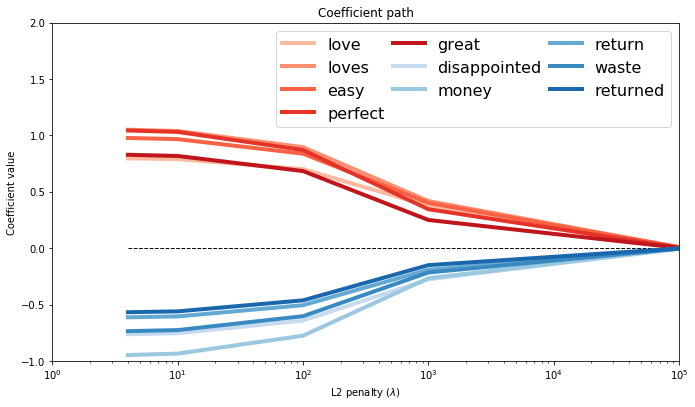

In [176]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

def make_coefficient_plot(table, positive_words, negative_words, l2_penalty_list):
    cmap_positive = plt.get_cmap('Reds')
    cmap_negative = plt.get_cmap('Blues')
    
    xx = l2_penalty_list
    plt.plot(xx, [0.]*len(xx), '--', lw=1, color='k')
    
    table_positive_words = table[table['index'].isin(positive_words)]
    table_negative_words = table[table['index'].isin(negative_words)]
    del table_positive_words['index']
    del table_negative_words['index']
    
    for i in range(len(positive_words)):
        color = cmap_positive(0.8*((i+1)/(len(positive_words)*1.2)+0.15))
        plt.plot(xx, table_positive_words[i:i+1].as_matrix().flatten(),
                 '-', label=positive_words[i], linewidth=4.0, color=color)
        
    for i in range(len(negative_words)):
        color = cmap_negative(0.8*((i+1)/(len(negative_words)*1.2)+0.15))
        plt.plot(xx, table_negative_words[i:i+1].as_matrix().flatten(),
                 '-', label=negative_words[i], linewidth=4.0, color=color)
        
    plt.legend(loc='best', ncol=3, prop={'size':16}, columnspacing=0.5)
    plt.axis([1, 1e5, -1, 2])
    plt.title('Coefficient path')
    plt.xlabel('L2 penalty ($\lambda$)')
    plt.ylabel('Coefficient value')
    plt.xscale('log')
    plt.rcParams.update({'font.size': 18})
    plt.tight_layout()


make_coefficient_plot(df, positive, negative, l2_penalty_list=[0, 4, 10, 1e2, 1e3, 1e5])


### Quiz Question: (True/False) All coefficients consistently get smaller in size as L2 penalty is increased.
   <h4><font color =red>True</font></h4>

### Quiz Question: (True/False)) Relative order of coefficients is preserved as L2 penalty is increased. (If word 'cat' was more positive than word 'dog', then it remains to be so as L2 penalty is increased.)
   <h4><font color =red>False</font></h4>


# Measuring accuracy
## 15. Now, let us compute the accuracy of the classifier model. Recall that the accuracy is given by

accuracy=# correctly classified data points# total data points
Recall from lecture that that the class prediction is calculated using

Note: It is important to know that the model prediction code doesn't change even with L2 penalty. The only thing that changes is that the estimated coefficients used in this prediction are different with L2 penalty.

### Quiz question: Which model (L2 = 0, 4, 10, 100, 1e3, 1e5) has the highest accuracy on the training data?
### Quiz question: Which model (L2 = 0, 4, 10, 100, 1e3, 1e5) has the highest accuracy on the validation data?
### Quiz question: Does the highest accuracy on the training data imply that the model is the best one?

In [179]:
def get_accuracy(feature_matrix, sentiment, coefficients):
    scores = np.dot(feature_matrix,coefficients)
    pred_fuc = np.vectorize(lambda x: 1 if x> 0 else -1)
    class_prediction = pred_fuc(scores)
    
    num_correct = (class_prediction == sentiment).sum()
    accuracy = num_correct / len(feature_matrix)    
    return accuracy

In [185]:
train_accuracy = {}
valid_accuracy = {}
train_accuracy[0] = get_accuracy(feature_matrix_train,sentiment_train,coefficients_0_penalty)
train_accuracy[4] = get_accuracy(feature_matrix_train,sentiment_train,coefficients_4_penalty)
train_accuracy[10] = get_accuracy(feature_matrix_train,sentiment_train,coefficients_10_penalty)
train_accuracy[100] = get_accuracy(feature_matrix_train,sentiment_train,coefficients_1e2_penalty)
train_accuracy[1e3] = get_accuracy(feature_matrix_train,sentiment_train,coefficients_1e3_penalty)
train_accuracy[1e5] = get_accuracy(feature_matrix_train,sentiment_train,coefficients_1e5_penalty)
valid_accuracy[0] = get_accuracy(feature_matrix_valid,sentiment_valid,coefficients_0_penalty)
valid_accuracy[4] = get_accuracy(feature_matrix_valid,sentiment_valid,coefficients_4_penalty)
valid_accuracy[10] = get_accuracy(feature_matrix_valid,sentiment_valid,coefficients_10_penalty)
valid_accuracy[100] = get_accuracy(feature_matrix_valid,sentiment_valid,coefficients_1e2_penalty)
valid_accuracy[1e3] = get_accuracy(feature_matrix_valid,sentiment_valid,coefficients_1e3_penalty)
valid_accuracy[1e5] = get_accuracy(feature_matrix_valid,sentiment_valid,coefficients_1e5_penalty)

In [186]:
train_accuracy, valid_accuracy


({0: 0.78515615778664338,
  4: 0.78510894454805125,
  10: 0.78499091145157107,
  100: 0.78397582682184086,
  1000.0: 0.77585514978399939,
  100000.0: 0.68036637473147465},
 {0: 0.78143964149005696,
  4: 0.78153300345439269,
  10: 0.78171972738306417,
  100: 0.78106619363271401,
  1000.0: 0.7713565493417982,
  100000.0: 0.66781813089347397})

In [ ]:
sentiment